## __RMSProp__
**Issues with AdaGrad**

- Accumulation of Squared Gradients:

  - AdaGrad continuously accumulates the squares of gradients throughout the optimization process. This accumulation can lead to excessively small learning rates as the sum of squares grows large.

- Impact on Learning Rates:

   - As a result of this constant accumulation, learning rates for each parameter or dimension of the search space become progressively smaller. This diminution can be so significant that it halts the optimization prematurely, preventing the algorithm from locating the optimal minimum.

**Introduction of RMSProp**

- Modifying AdaGrad's Approach:

   - RMSProp modifies AdaGrad’s method by using a decaying average (or moving average) of the squared gradients instead of their cumulative sum. This approach adjusts the learning rate dynamically for each parameter based on more recent gradients.

- Role of the Hyperparameter Rho:

   - A new hyperparameter, called rho, is introduced in RMSProp. This hyperparameter functions similarly to momentum and is crucial in managing the decay rate of the moving average, allowing for a more responsive adaptation to changes in gradient values.
   
Let's understand how RMSProp works.

## Steps to be followed:
1. Import the required libraries
2. Define and plot the objective function
3. Implement RMSProp algorithm
4. Optimize the RMSProp


### Step 1: Import the Required Libraries

- Import NumPy packages
- Import the Python package matplotlib, which sets the padding between and around the subplots as well as the figure size
- Import all other necessary libraries

In [2]:
from math import sqrt
from numpy import asarray, arange, meshgrid
from numpy.random import rand, seed
from matplotlib import pyplot
from sympy import symbols, diff

### Step 2: Define and plot the objective function
- Define the objective function as the sum of squares of x and y.
- Set the bounds for input variables.
- Generate arrays of x and y values within the specified bounds at 0.1 increments.
- Create a mesh grid from the x and y arrays.
- Compute the objective function values for each combination of x and y in the mesh grid.
- Create a filled contour plot with 50 contour levels and 'jet' color scheme.
- Display the plot.



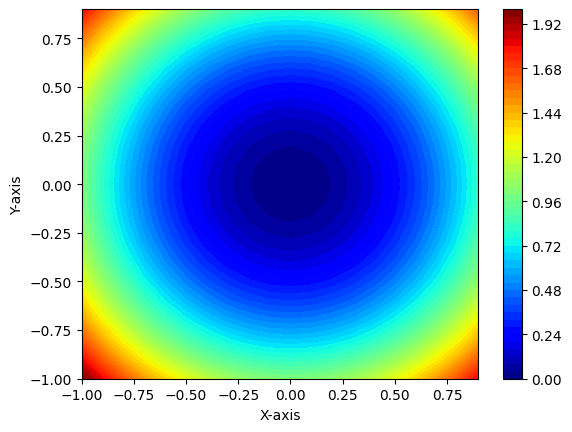

In [3]:
# Define the Objective Function
def objective(x, y):
    return x**2.0 + y**2.0

# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# Plot the objective function contour
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
x, y = meshgrid(xaxis, yaxis)
results_obj = objective(x, y)
pyplot.contourf(x, y, results_obj, levels=50, cmap='jet')
pyplot.colorbar()  # Add a color bar to indicate scale
pyplot.xlabel('X-axis')
pyplot.ylabel('Y-axis')
pyplot.show()

**Observation**:
- The observation for the given code is that the contour plot shows a symmetric bowl-shaped pattern, indicating that the objective function has a minimum point at or near the origin (x = 0, y = 0).
- The color intensity in the plot represents the function's values, with darker regions indicating lower values and lighter regions indicating higher values.





### Step 3: Implement RMSProp Algorithm
 - The RMSProp algorithm is a variant of the gradient descent optimization algorithm that adjusts the step size for each variable based on the average of the squared gradients.

- In each iteration, RMSProp calculates the gradient of the objective function, updates the average of the squared partial derivatives, adjusts the step size for each variable, and updates the solution accordingly. The process is repeated for a specified number of iterations.

In [4]:
# Calculate the derivative of the objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

# Implement the RMSProp optimization algorithm
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]

    for it in range(n_iter):
        gradient = derivative(solution[0], solution[1])
        for i in range(len(gradient)):
            sg = gradient[i]**2.0
            sq_grad_avg[i] = rho * sq_grad_avg[i] + (1 - rho) * sg
            alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
            solution[i] -= alpha * gradient[i]

        solution_eval = objective(solution[0], solution[1])
        print('>%d f(%s) = %.8e' % (it, solution, solution_eval))
    return [solution, solution_eval]

## Step 4: Optimize the RMSProp
- Set the random seed to ensure reproducibility.
- Define the bounds for the input variables.
- Specify the number of iterations.
- Set the value of rho for the RMSProp algorithm.
- Apply the RMSProp algorithm to find the best solution and its corresponding score.
- Print messages indicating the completion of the optimization process.

In [5]:
# Seed for reproducibility
seed(1)
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 50
step_size = 0.01
rho = 0.99

results_derivative = derivative(x,y)

# Perform optimization using RMSProp
best, score = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
print('Done!')
print('f(%s) = %.8e' % (best, score))

>0 f([-0.06595602  0.340649  ]) = 1.20391937e-01
>1 f([-0.02886236  0.27929536]) = 7.88389317e-02
>2 f([-0.01276125  0.23417693]) = 5.50016854e-02
>3 f([-0.00562466  0.19863849]) = 3.94888876e-02
>4 f([-0.00246486  0.16964301]) = 2.87848273e-02
>5 f([-0.00107332  0.145492  ]) = 2.11690749e-02
>6 f([-0.00046434  0.12511178]) = 1.56531734e-02
>7 f([-0.00019955  0.10776512]) = 1.16133604e-02
>8 f([-8.51860635e-05  9.29147925e-02]) = 8.63316593e-03
>9 f([-3.61188240e-05  8.01516212e-02]) = 6.42428369e-03
>10 f([-1.52095444e-05  6.91533161e-02]) = 4.78218136e-03
>11 f([-6.36034309e-06  5.96594573e-02]) = 3.55925088e-03
>12 f([-2.64113212e-06  5.14554696e-02]) = 2.64766536e-03
>13 f([-1.08894956e-06  4.43619097e-02]) = 1.96797904e-03
>14 f([-4.45754295e-07  3.82270235e-02]) = 1.46130533e-03
>15 f([-1.81140176e-07  3.29213925e-02]) = 1.08381809e-03
>16 f([-7.30678086e-08  2.83339599e-02]) = 8.02813283e-04
>17 f([-2.92542666e-08  2.43689933e-02]) = 5.93847834e-04
>18 f([-1.16242022e-08  2.0943

**Observation:**
- RMSProp optimizes the objective function with an optimal solution emerging around the 33rd iteration. The parameters of the solution were close to 0.0 for both inputs, leading to an evaluation of the objective function at 0.0.

## Unassisted Practice:

As part of your continuing exploration of optimization algorithms, please refer back to the AdaGrad visualization we studied in the previous notebook. We encourage you to now create a similar visualization for RMSProp. This exercise will enhance your understanding of how RMSProp facilitates the function's convergence and how it compares to AdaGrad in practical scenarios.


C:\Users\prate\AppData\Local\Temp\ipykernel_36776\2348527763.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(solutions[:, 0], solutions[:, 1], path_z, 'r.-', linewidth=3, markersize=8,


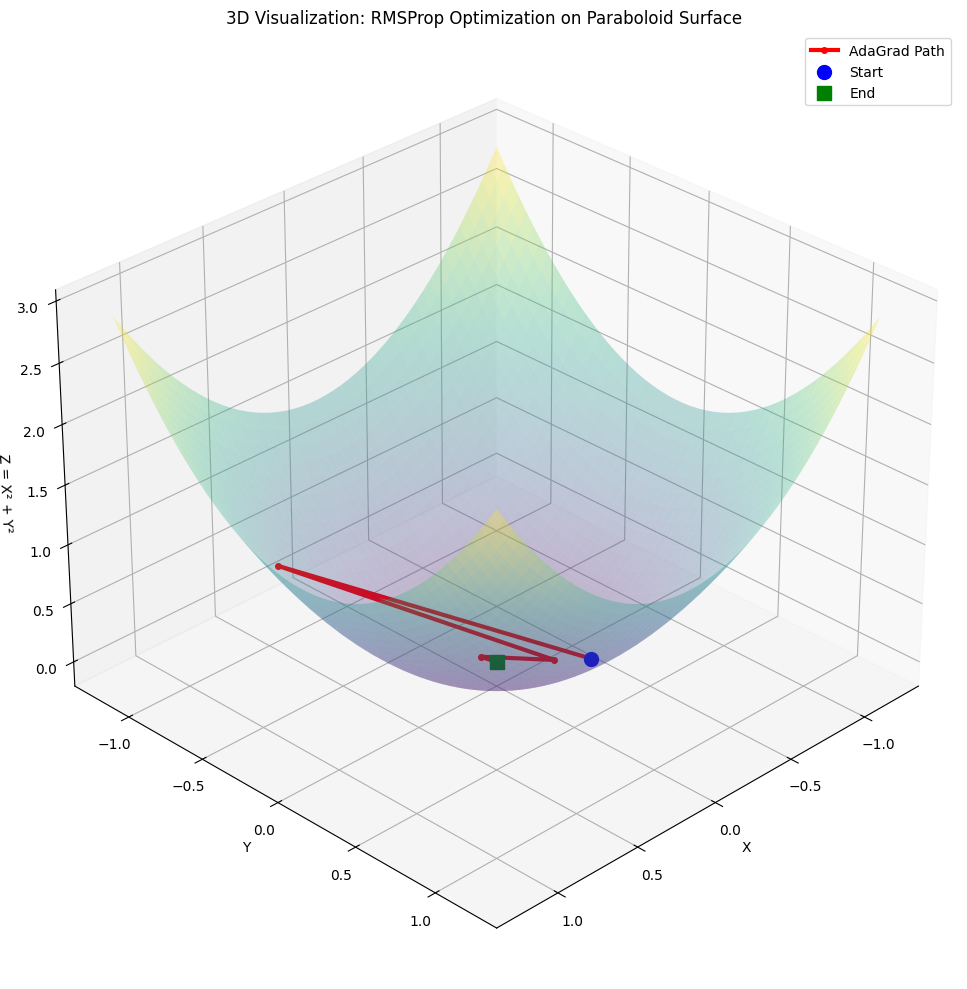

Starting point: (-0.1660, 0.4406)
Ending point: (0.0000, -0.0000)
Starting objective value: 0.221713
Final objective value: 0.000000


In [7]:
# 3D Visualization of AdaGrad on the Paraboloid Surface
import numpy as np
from numpy.random import seed, rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

# Use the same functions as before
def objective(x, y):
    return x**2.0 + y**2.0

def derivative(x, y):
    return np.array([x * 2.0, y * 2.0])

def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
    solutions = []
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    sq_grad_avg = np.zeros(len(bounds))

    for it in range(n_iter):
        solutions.append(solution.copy())
        gradient = derivative(solution[0], solution[1])
        sg = gradient**2.0
        sq_grad_avg = rho * sq_grad_avg + (1 - rho) * sg
        alpha = step_size / (1e-8 + np.sqrt(sq_grad_avg))
        solution -= alpha * gradient
    
    return np.array(solutions)

# Set random seed for reproducibility
seed(1)

# Define parameters
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
n_iter = 30  # Reduced for clearer visualization
step_size = 0.1
rho = 0.99

# Get optimization path
solutions = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)

# Create 3D surface
x = np.linspace(-1.2, 1.2, 50)
y = np.linspace(-1.2, 1.2, 50)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)

# Calculate z-values for the optimization path
path_z = objective(solutions[:, 0], solutions[:, 1])

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with transparency
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3, edgecolor='none')

# Plot the optimization path
ax.plot(solutions[:, 0], solutions[:, 1], path_z, 'r.-', linewidth=3, markersize=8, 
        label='AdaGrad Path', color='red')

# Mark starting and ending points
ax.scatter(solutions[0, 0], solutions[0, 1], path_z[0], 
          color='blue', s=100, label='Start', marker='o')
ax.scatter(solutions[-1, 0], solutions[-1, 1], path_z[-1], 
          color='green', s=100, label='End', marker='s')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z = X² + Y²')
ax.set_title('3D Visualization: RMSProp Optimization on Paraboloid Surface')
ax.legend()

# Set viewing angle
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

# Print some path statistics
print(f"Starting point: ({solutions[0, 0]:.4f}, {solutions[0, 1]:.4f})")
print(f"Ending point: ({solutions[-1, 0]:.4f}, {solutions[-1, 1]:.4f})")
print(f"Starting objective value: {path_z[0]:.6f}")
print(f"Final objective value: {path_z[-1]:.6f}")